In [36]:
import random
from datasets import load_dataset


In [1]:
import json
from collections import defaultdict

# Load the JSON data from a file
file_path = 'eval_results/model_outputs_Meta-Llama-3-8B-Instruct_5shots.json'  # Replace with your file path
with open(file_path, 'r') as file:
    data = json.load(file)

# Initialize dictionaries to track correct answers and total questions per category
correct_answers = defaultdict(int)
total_questions = defaultdict(int)

# Calculate accuracy per category
for entry in data:
    category = entry['category']
    total_questions[category] += 1
    if entry['answer'] == entry['pred']:
        correct_answers[category] += 1

# Compute and display accuracy
accuracy_per_category = {}
for category in total_questions:
    accuracy_per_category[category] = correct_answers[category] / total_questions[category] * 100

# Print accuracy per category
for category, accuracy in accuracy_per_category.items():
    print(f"Category: {category}, Accuracy: {accuracy:.2f}%")


Category: business, Accuracy: 39.67%
Category: law, Accuracy: 26.34%
Category: psychology, Accuracy: 59.40%
Category: biology, Accuracy: 66.25%
Category: chemistry, Accuracy: 25.53%
Category: history, Accuracy: 42.26%
Category: other, Accuracy: 45.89%
Category: health, Accuracy: 48.90%
Category: economics, Accuracy: 53.20%
Category: math, Accuracy: 33.31%
Category: physics, Accuracy: 33.26%
Category: computer science, Accuracy: 42.20%
Category: philosophy, Accuracy: 40.08%
Category: engineering, Accuracy: 30.65%


In [28]:
def modify_question(question_data):
    # Remove the correct option based on the answer_index
    for i, option in enumerate(question_data["options"]):
        if "none" in option.lower() and "above" in option.lower():
            return question_data
        
    correct_index = question_data["answer_index"]  # Convert to 0-based index
    question_data["options"].pop(correct_index)
    
    # Add "None of the above are correct" as a new option
    question_data["options"].append("None of the above are correct")
    
    # Update the answer_index and answer
    question_data["answer_index"] = len(question_data["options"]) - 1  # Last option is now the answer
    question_data["answer"] = chr(64 + question_data["answer_index"])  # Convert index to letter (A, B, C...)
    
    return question_data

In [21]:
random.random()

0.6767893663825661

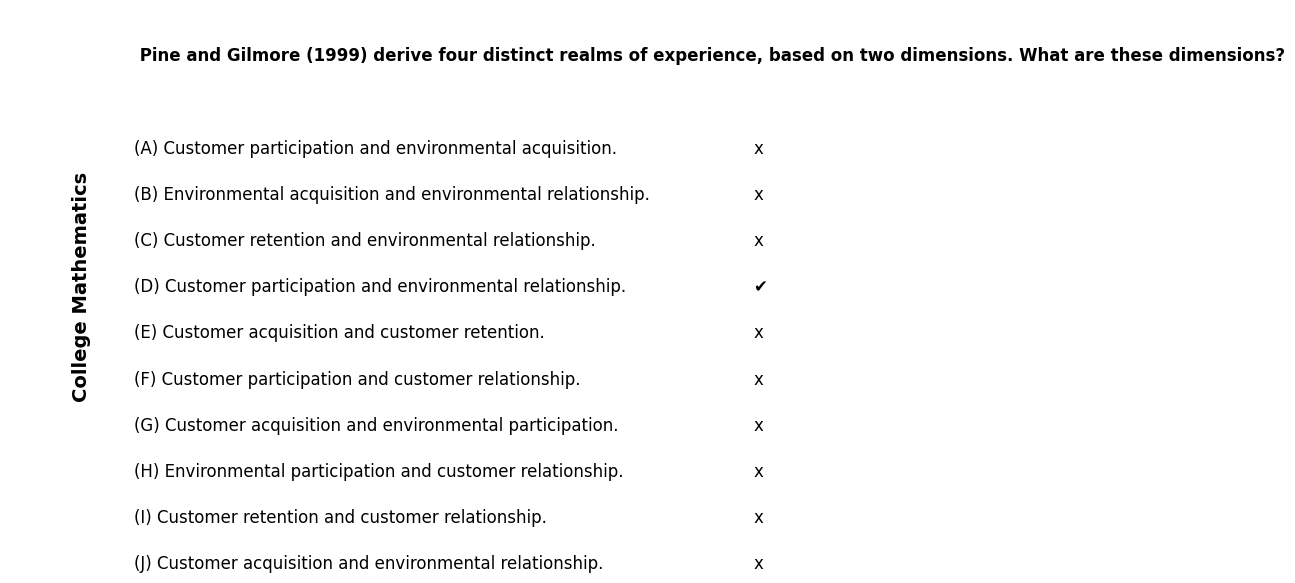

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
# csv_file_path = "sampled_mmlu.csv"  # Replace with your actual CSV file path
# data = pd.read_csv(csv_file_path)

# Select a random row as an example
example = {'question_id': 76,
 'Question': ' Pine and Gilmore (1999) derive four distinct realms of experience, based on two dimensions. What are these dimensions?',
 'options': ['Customer participation and environmental acquisition.',
  'Environmental acquisition and environmental relationship.',
  'Customer retention and environmental relationship.',
  'Customer participation and environmental relationship.',
  'Customer acquisition and customer retention.',
  'Customer participation and customer relationship.',
  'Customer acquisition and environmental participation.',
  'Environmental participation and customer relationship.',
  'Customer retention and customer relationship.',
  'Customer acquisition and environmental relationship.'],
 'answer': 'D',
 'answer_index': 3,
 'cot_content': '',
 'category': 'business',
 'src': 'ori_mmlu-marketing'}

# Extract the question and options
question = example['Question']
options = {
    'A': example['options'][0],
    'B': example['options'][1],
    'C': example['options'][2],
    'D': example['options'][3],
    'E': example['options'][4],
    'F': example['options'][5],
    'G': example['options'][6],
    'H': example['options'][7],
    'I': example['options'][8],
    'J': example['options'][9],
}
correct_answer = example['answer']

# Create the plot
# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Display the question
ax.text(0.1, 0.4, "College Mathematics", fontsize=14, rotation=90, verticalalignment='center', fontweight='bold')
ax.text(0.2, 0.9, question, fontsize=12, verticalalignment='center', fontweight='bold')

# Display the options vertically
y_start = 0.7
line_spacing = 0.1
for i, (key, value) in enumerate(options.items()):
    is_correct = key == correct_answer.strip().upper()
    marker = "✔️" if is_correct else "x"
    ax.text(0.2, y_start - i * line_spacing, f"({key}) {value}", fontsize=12, verticalalignment='center')
    ax.text(1.2, y_start - i * line_spacing, marker, fontsize=12, verticalalignment='center')

# Remove axes
ax.axis('off')

# Display the plot
plt.show()


In [41]:
!pip install matplotlib

  Using cached contourpy-1.3.1-cp312-cp312-macosx_11_0_arm64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.7-cp312-cp312-macosx_11_0_arm64.whl.metadata (6.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 4.3 MB/s eta 0:00:00a 0:00:01
Using cached contourpy-1.3.1-cp312-cp312-macosx_11_0_arm64.whl (255 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 7.4 MB/s eta 0:00:00a 0:00:01
Using cached kiwisolver-1.4.7-cp312-cp312-macosx_11_0_arm64.whl (63 kB)


In [60]:
import os
import json
from glob import glob

def get_total_acc_from_files(folder_path):
    # Dictionary to store acc values
    acc_dict = {}
    
    # Get all *_summary.json files in the folder
    json_files = glob(os.path.join(folder_path, "*_summary.json"))
    
    for file in json_files:
        try:
            # Open and read the JSON file
            with open(file, 'r') as f:
                data = json.load(f)
            
            # Extract the "acc" value from the "total" key
            acc_value = data.get("total", {}).get("acc", None)
            if acc_value is not None:
                # Add to dictionary with filename as the key
                acc_dict[os.path.basename(file)] = acc_value
        except (json.JSONDecodeError, KeyError) as e:
            print(f"Error reading file {file}: {e}")
    
    return acc_dict

# Example usage
folder_path = "eval_results_original/"
acc_results = get_total_acc_from_files(folder_path)
print(acc_results)


{'other_summary.json': 0.6666666666666666, 'chemistry_summary.json': 0.6068904593639576, 'engineering_summary.json': 0.3792325056433409, 'biology_summary.json': 0.810320781032078, 'law_summary.json': 0.38056312443233425, 'computer science_summary.json': 0.6804878048780488, 'physics_summary.json': 0.6171032357473035, 'psychology_summary.json': 0.7506265664160401, 'business_summary.json': 0.7046894803548795, 'philosophy_summary.json': 0.531062124248497, 'history_summary.json': 0.5669291338582677, 'math_summary.json': 0.7054034048852702, 'economics_summary.json': 0.7428909952606635, 'health_summary.json': 0.684596577017115}


In [61]:
folder_path_none = "eval_results_shuffled/"
acc_results_none = get_total_acc_from_files(folder_path_none)
print(acc_results_none)

{'other_summary.json': 0.670995670995671, 'chemistry_summary.json': 0.5962897526501767, 'engineering_summary.json': 0.38802889576883387, 'biology_summary.json': 0.803347280334728, 'law_summary.json': 0.371480472297911, 'computer science_summary.json': 0.6634146341463415, 'physics_summary.json': 0.6320246343341032, 'psychology_summary.json': 0.7180451127819549, 'business_summary.json': 0.6920152091254753, 'philosophy_summary.json': 0.5210420841683366, 'history_summary.json': 0.5774278215223098, 'math_summary.json': 0.7085308056872038, 'economics_summary.json': 0.7215639810426541, 'health_summary.json': 0.6515892420537898}


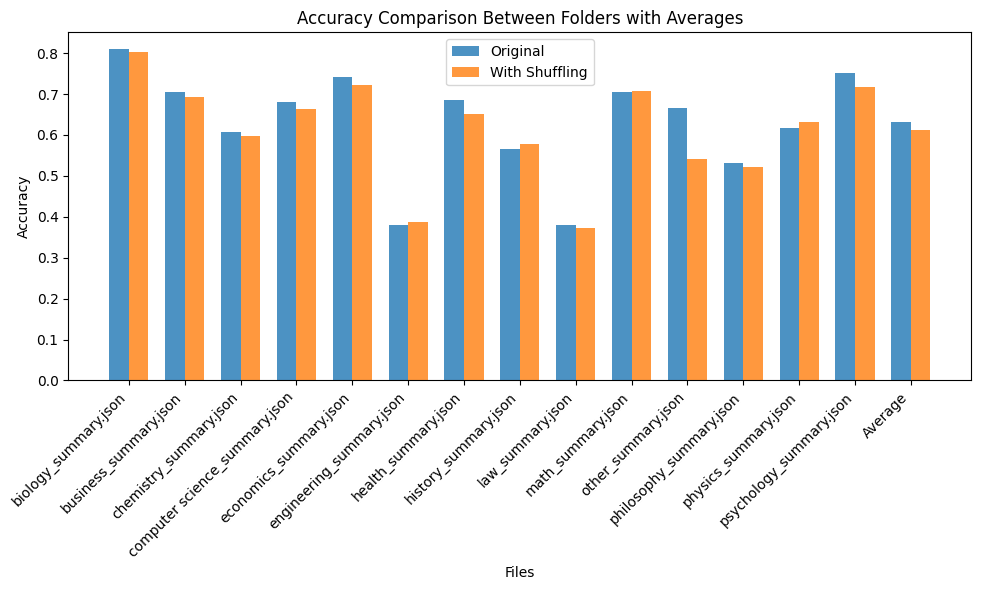

In [62]:
import matplotlib.pyplot as plt
import numpy as np

# Example dictionaries from two folders
folder1_dict = {'other_summary.json': 0.6666666666666666, 'chemistry_summary.json': 0.6068904593639576, 'engineering_summary.json': 0.3792325056433409, 'biology_summary.json': 0.810320781032078, 'law_summary.json': 0.38056312443233425, 'computer science_summary.json': 0.6804878048780488, 'physics_summary.json': 0.6171032357473035, 'psychology_summary.json': 0.7506265664160401, 'business_summary.json': 0.7046894803548795, 'philosophy_summary.json': 0.531062124248497, 'history_summary.json': 0.5669291338582677, 'math_summary.json': 0.7054034048852702, 'economics_summary.json': 0.7428909952606635, 'health_summary.json': 0.684596577017115}


folder2_dict = {'other_summary.json': 0.5405405405405406, 'chemistry_summary.json': 0.5962897526501767, 'engineering_summary.json': 0.38802889576883387, 'biology_summary.json': 0.803347280334728, 'law_summary.json': 0.371480472297911, 'computer science_summary.json': 0.6634146341463415, 'physics_summary.json': 0.6320246343341032, 'psychology_summary.json': 0.7180451127819549, 'business_summary.json': 0.6920152091254753, 'philosophy_summary.json': 0.5210420841683366, 'history_summary.json': 0.5774278215223098, 'math_summary.json': 0.7085308056872038, 'economics_summary.json': 0.7215639810426541, 'health_summary.json': 0.6515892420537898}


# Combine keys from both dictionaries to align filenames
all_files = sorted(set(folder1_dict.keys()).union(set(folder2_dict.keys())))

# Prepare data
folder1_acc = [folder1_dict.get(file, 0) for file in all_files]
folder2_acc = [folder2_dict.get(file, 0) for file in all_files]

# Calculate averages
folder1_avg = sum(folder1_acc) / len(folder1_acc)
folder2_avg = sum(folder2_acc) / len(folder2_acc)

# Add "Average" as the last entry
all_files.append("Average")
folder1_acc.append(folder1_avg)
folder2_acc.append(folder2_avg)

# Bar chart setup
x = np.arange(len(all_files))  # X positions for the files
width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for folder1 and folder2
bars1 = ax.bar(x - width/2, folder1_acc, width, label='Original', alpha=0.8)
bars2 = ax.bar(x + width/2, folder2_acc, width, label='With Shuffling', alpha=0.8)

# Add labels and title
ax.set_xlabel('Files')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Comparison Between Folders with Averages')
ax.set_xticks(x)
ax.set_xticklabels(all_files, rotation=45, ha='right')
ax.legend()

# Display the bar chart
plt.tight_layout()
plt.show()


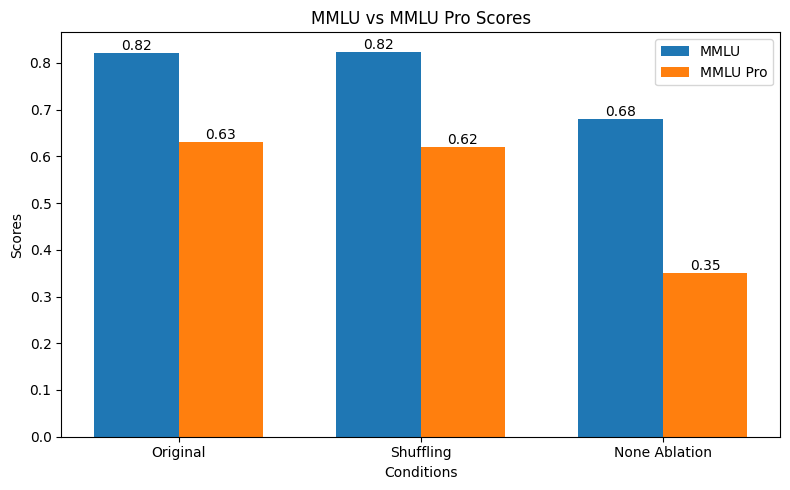

In [63]:
import matplotlib.pyplot as plt
import numpy as np

# Data
conditions = ['Original', 'Shuffling', 'None Ablation']
mmlu_scores = [0.821, 0.824, 0.679]
mmlu_pro_scores = [0.63, 0.62, 0.35]

# Plotting
x = np.arange(len(conditions))  # Label locations
width = 0.35  # Bar width

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, mmlu_scores, width, label='MMLU')
bars2 = ax.bar(x + width/2, mmlu_pro_scores, width, label='MMLU Pro')

# Add labels and title
ax.set_xlabel('Conditions')
ax.set_ylabel('Scores')
ax.set_title('MMLU vs MMLU Pro Scores')
ax.set_xticks(x)
ax.set_xticklabels(conditions)
ax.legend()

# Adding values on top of bars
for bars in [bars1, bars2]:
    ax.bar_label(bars, fmt='%.2f')

# Show plot
plt.tight_layout()
plt.show()


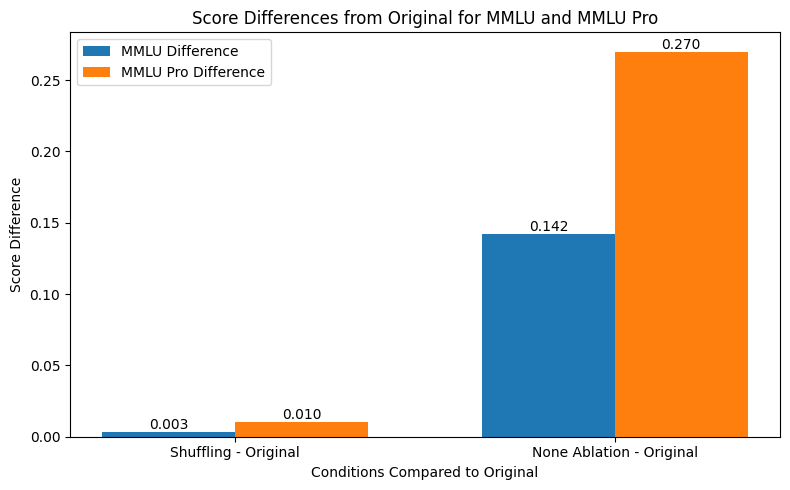

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
conditions = ['Shuffling', 'None Ablation']
mmlu_differences = [0.824 - 0.821, - 0.679 + 0.821]
mmlu_pro_differences = [- 0.62 + 0.63, - 0.35 + 0.62]

# Plotting
x = np.arange(len(conditions))  # Label locations
width = 0.35  # Bar width

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, mmlu_differences, width, label='MMLU Difference')
bars2 = ax.bar(x + width/2, mmlu_pro_differences, width, label='MMLU Pro Difference')

# Add labels and title
ax.set_xlabel('Conditions Compared to Original')
ax.set_ylabel('Score Difference')
ax.set_title('Score Differences from Original for MMLU and MMLU Pro')
ax.set_xticks(x)
ax.set_xticklabels(conditions)
ax.legend()

# Adding values on top of bars
for bars in [bars1, bars2]:
    ax.bar_label(bars, fmt='%.3f')

# Show plot
plt.tight_layout()
plt.show()
